In [1]:
# libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# read/load data files
total_2018_df = pd.read_csv('./transformed-data/data_2018_all.csv')
total_2020_df = pd.read_csv('./transformed-data/data_2020_all.csv')

ca_2018_df = pd.read_csv('./transformed-data/2018_CA_data.csv')
ca_2020_df = pd.read_csv('./transformed-data/2020_CA_data.csv')

gb_2018_df = pd.read_csv('./transformed-data/2018_GB_data.csv')
gb_2020_df = pd.read_csv('./transformed-data/2020_GB_data.csv')

us_2018_df = pd.read_csv('./transformed-data/2018_US_data.csv')
us_2020_df = pd.read_csv('./transformed-data/2020_US_data.csv')

## Total Yearly Data

In [3]:
# categorize data by video category
cat_count_total_2018 = total_2018_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_total_2018['likes_to_views'] = ((cat_count_total_2018['likes'] / cat_count_total_2018['views'])*100)
cat_count_total_2018 = cat_count_total_2018.rename(columns={'category_id':'cat_count'})
# appears that YouTube removed Shows and Movies categories
# https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/
cat_count_total_2018 = cat_count_total_2018[(cat_count_total_2018['cat_name'] != 'Movies') & (cat_count_total_2018['cat_name'] != 'Shows')]
cat_count_total_2018 = cat_count_total_2018.sort_values(by='likes_to_views')

cat_count_total_2020 = total_2020_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_total_2020['likes_to_views'] = ((cat_count_total_2020['likes'] / cat_count_total_2020['views'])*100)
cat_count_total_2020 = cat_count_total_2020.rename(columns={'category_id':'cat_count'})
cat_count_total_2020 = cat_count_total_2020.sort_values(by='likes_to_views')

In [4]:
# cat_count_total_2018

In [5]:
# cat_count_total_2020

### Total Likes to Views

                 cat_name  likes_to_views_2018  likes_to_views_2020
0        Autos & Vehicles             0.946085             5.427101
1         Travel & Events             1.377778             4.544584
2        Film & Animation             2.173623             5.291065
3         News & Politics             2.243900             1.582537
4                  Sports             2.321333             2.501775
5                   Music             2.394883             7.539095
6    Science & Technology             2.415498             3.697808
7          People & Blogs             2.479258             6.434233
8           Entertainment             2.567791             6.572832
9          Pets & Animals             2.882793             5.141837
10              Education             3.891539             7.132108
11                 Gaming             4.165293             4.927249
12          Howto & Style             4.209038             6.166092
13                 Comedy             4.223310  

Text(0.5, 1.0, 'Likes to Views by Category per Year')

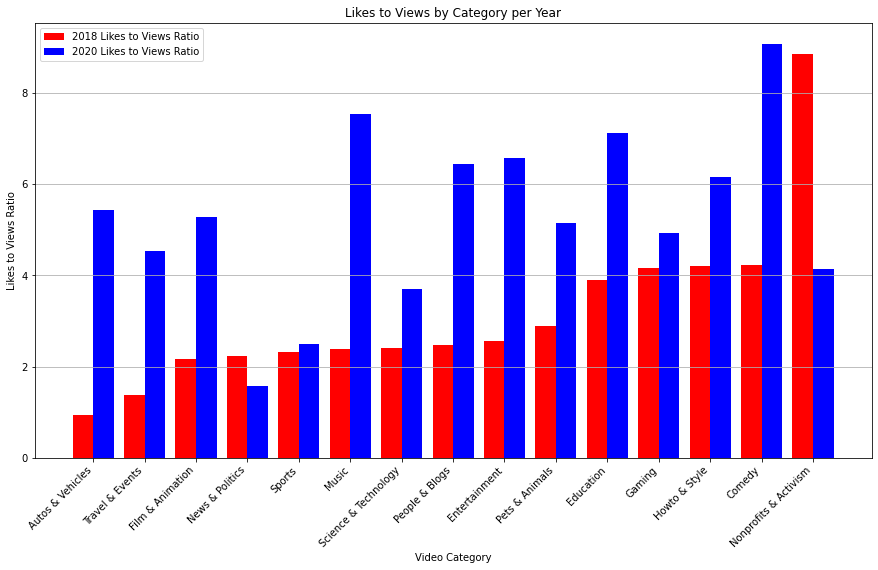

In [6]:
# comparing likes to views for each 
cat_count_total_merged = cat_count_total_2018.merge(cat_count_total_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_total_merged
print(cat_count_total_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']])
total_merged_likes_to_views = cat_count_total_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']]

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_total_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_total_merged['likes_to_views_2018'], width=0.4, label='2018 Likes to Views Ratio', color='red')
plt.bar(ypos+0.2, cat_count_total_merged['likes_to_views_2020'], width=0.4, label='2020 Likes to Views Ratio', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_total_merged['cat_name'])
ax.set_xticklabels(cat_count_total_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes to Views Ratio')
title = 'Likes to Views by Category per Year'
plt.title(title)


### Total Views Data

                 cat_name    views_2018   views_2020
0        Autos & Vehicles     697118905    868345809
1         Travel & Events     459851229     96901673
2        Film & Animation   10341654864   2663691525
3         News & Politics    2101086849   1770135505
4                  Sports    7310130139   8264143003
5                   Music  120964062397  43511455516
6    Science & Technology    3153342027   5764429720
7          People & Blogs    8622378355   7188136112
8           Entertainment   30948811103  19901726763
9          Pets & Animals     768339292    284910043
10              Education    1229810588   1204574267
11                 Gaming    2469110423  10460961740
12          Howto & Style    3244502736   2125619599
13                 Comedy    6645665257   3802525055
14  Nonprofits & Activism     166060038     15717274


Text(0.5, 1.0, 'Views by Category per Year')

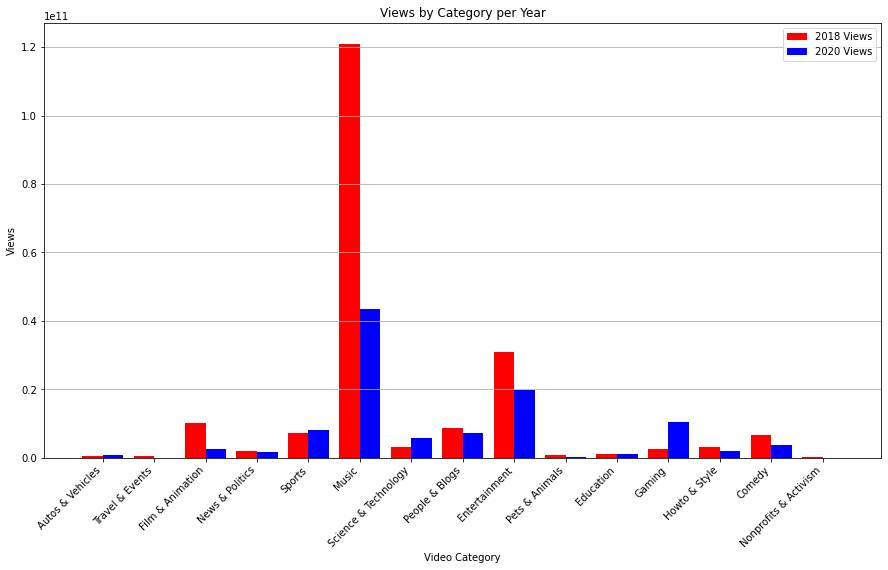

In [7]:
# comparing likes to views for each 
cat_count_total_merged = cat_count_total_2018.merge(cat_count_total_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_total_merged
print(cat_count_total_merged[['cat_name', 'views_2018', 'views_2020']])

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_total_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_total_merged['views_2018'], width=0.4, label='2018 Views', color='red')
plt.bar(ypos+0.2, cat_count_total_merged['views_2020'], width=0.4, label='2020 Views', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_total_merged['cat_name'])
ax.set_xticklabels(cat_count_total_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Views')

# Create the title of the barplot
plt.title("Views by Category per Year")

### Total Likes Data

                 cat_name  likes_2018  likes_2020
0        Autos & Vehicles     6595338    47126002
1         Travel & Events     6335731     4403778
2        Film & Animation   224788551   140937638
3         News & Politics    47146279    28013042
4                  Sports   169692485   206750255
5                   Music  2896947716  3280370080
6    Science & Technology    76168898   213157550
7          People & Blogs   213771005   462501395
8           Entertainment   794700801  1308107137
9          Pets & Animals    22149635    14649611
10              Education    47858556    85911538
11                 Gaming   102845682   515437678
12          Howto & Style   136562339   131067656
13                 Comedy   280667076   345219549
14  Nonprofits & Activism    14716813      651744


Text(0.5, 1.0, 'Likes by Category per Year')

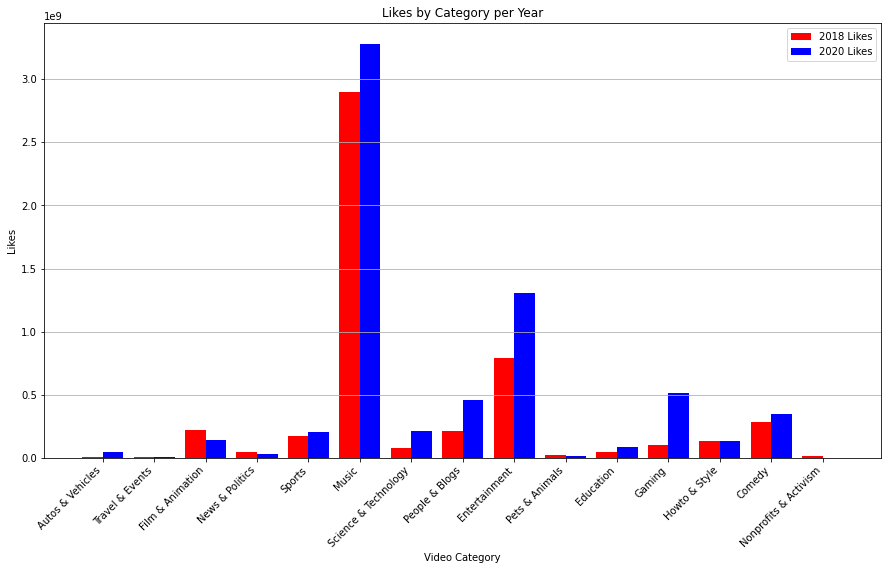

In [8]:
# comparing likes to views for each 
cat_count_total_merged = cat_count_total_2018.merge(cat_count_total_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_total_merged
print(cat_count_total_merged[['cat_name', 'likes_2018', 'likes_2020']])

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_total_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_total_merged['likes_2018'], width=0.4, label='2018 Likes', color='red')
plt.bar(ypos+0.2, cat_count_total_merged['likes_2020'], width=0.4, label='2020 Likes', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_total_merged['cat_name'])
ax.set_xticklabels(cat_count_total_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes')

# Create the title of the barplot
plt.title("Likes by Category per Year")

### Canada Yearly Data

In [9]:
# categorize data by video category
cat_count_ca_2018 = ca_2018_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_ca_2018['likes_to_views'] = ((cat_count_ca_2018['likes'] / cat_count_ca_2018['views'])*100)
cat_count_ca_2018 = cat_count_ca_2018.rename(columns={'category_id':'cat_count'})
# appears that YouTube removed Shows and Movies categories
# https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/
cat_count_ca_2018 = cat_count_ca_2018[(cat_count_ca_2018['cat_name'] != 'Movies') & (cat_count_ca_2018['cat_name'] != 'Shows')]
cat_count_ca_2018 = cat_count_ca_2018.sort_values(by='likes_to_views')

cat_count_ca_2020 = ca_2020_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_ca_2020['likes_to_views'] = ((cat_count_ca_2020['likes'] / cat_count_ca_2020['views'])*100)
cat_count_ca_2020 = cat_count_ca_2020.rename(columns={'category_id':'cat_count'})
cat_count_ca_2020 = cat_count_ca_2020.sort_values(by='likes_to_views')

### Canada Likes to Views

                cat_name  likes_to_views_2018  likes_to_views_2020
0                 Sports             1.988744             2.585885
1       Autos & Vehicles             1.993554             5.251247
2        News & Politics             2.188774             1.678835
3        Travel & Events             2.419784             5.350629
4          Entertainment             2.708456             6.905154
5       Film & Animation             2.740353             5.366740
6         People & Blogs             2.851173             6.532402
7   Science & Technology             3.292407             3.826214
8          Howto & Style             3.321989             6.121261
9         Pets & Animals             3.825016             5.139243
10             Education             3.966004             7.010182
11                 Music             4.211576             7.507792
12                Gaming             4.484776             4.999523
13                Comedy             5.102046             9.52

Text(0.5, 1.0, 'Likes to Views by Category per Year')

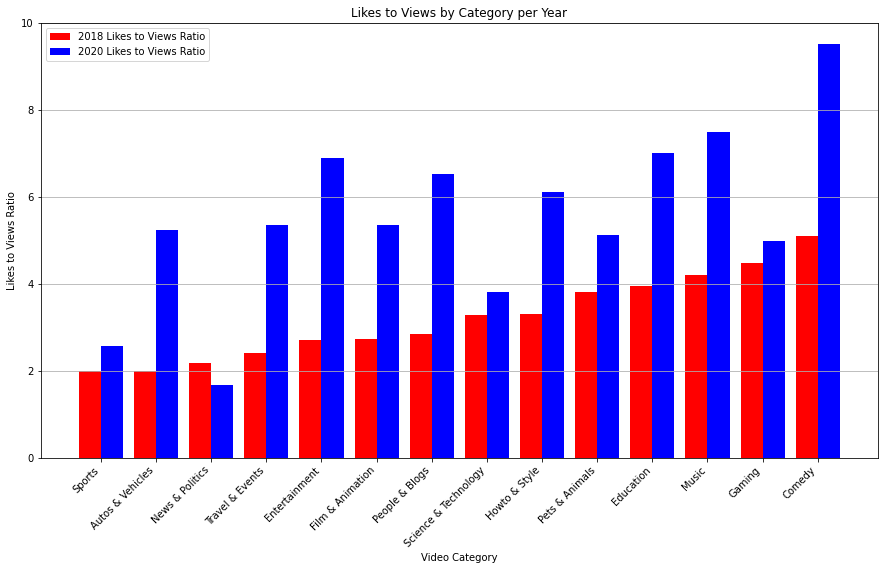

In [10]:
# comparing likes to views for each 
cat_count_ca_merged = cat_count_ca_2018.merge(cat_count_ca_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_ca_merged
print(cat_count_ca_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']])
ca_merged_likes_to_views = cat_count_ca_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']]

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_ca_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_ca_merged['likes_to_views_2018'], width=0.4, label='2018 Likes to Views Ratio', color='red')
plt.bar(ypos+0.2, cat_count_ca_merged['likes_to_views_2020'], width=0.4, label='2020 Likes to Views Ratio', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_ca_merged['cat_name'])
ax.set_xticklabels(cat_count_ca_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes to Views Ratio')
title = 'Likes to Views by Category per Year'
plt.title(title)

### Canada Views

                cat_name  views_2018   views_2020
0                 Sports  1767117567   2747984650
1       Autos & Vehicles   135481808    272618253
2        News & Politics   873081571    652607675
3        Travel & Events    93102335     37576538
4          Entertainment  6723899965   6723469046
5       Film & Animation  1627394475    915029794
6         People & Blogs  1791751558   2443456243
7   Science & Technology   606646908   1992843552
8          Howto & Style   675669539    802096319
9         Pets & Animals    91752101    100470784
10             Education   295026958    441864741
11                 Music  6450491107  14972410982
12                Gaming   603395844   3581267901
13                Comedy  1832774792   1498414786


Text(0.5, 1.0, 'Views by Category per Year')

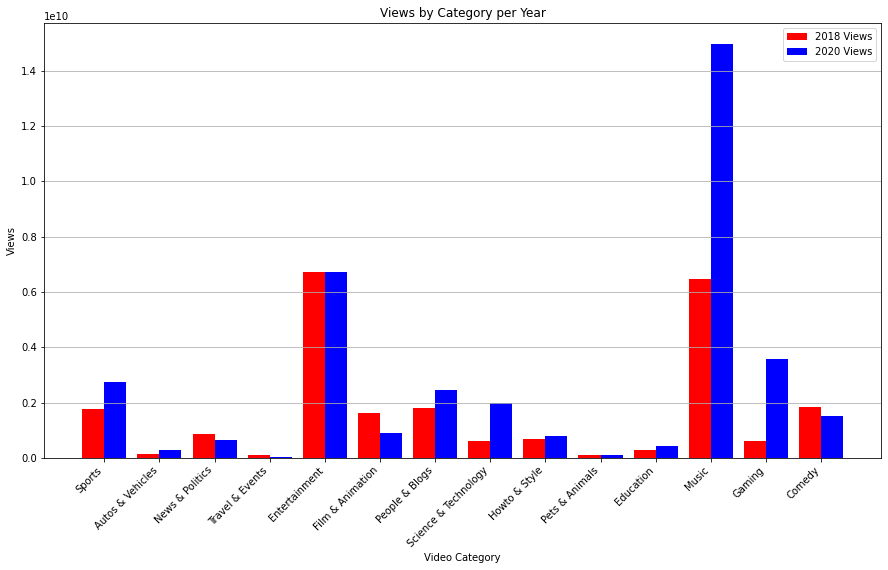

In [11]:
# comparing likes to views for each 
cat_count_ca_merged = cat_count_ca_2018.merge(cat_count_ca_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_ca_merged
print(cat_count_ca_merged[['cat_name', 'views_2018', 'views_2020']])

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_ca_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_ca_merged['views_2018'], width=0.4, label='2018 Views', color='red')
plt.bar(ypos+0.2, cat_count_ca_merged['views_2020'], width=0.4, label='2020 Views', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_ca_merged['cat_name'])
ax.set_xticklabels(cat_count_ca_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Views')

# Create the title of the barplot
plt.title("Views by Category per Year")

### Canada Likes

                cat_name  likes_2018  likes_2020
0                 Sports    35143439    71059718
1       Autos & Vehicles     2700903    14315858
2        News & Politics    19109785    10956205
3        Travel & Events     2252875     2010581
4          Entertainment   182113870   464265908
5       Film & Animation    44596360    49107274
6         People & Blogs    51085931   159616391
7   Science & Technology    19973286    76250451
8          Howto & Style    22445667    49098406
9         Pets & Animals     3509533     5163438
10             Education    11700780    30975522
11                 Music   271667341  1124097488
12                Gaming    27060955   179046330
13                Comedy    93509004   142793712


Text(0.5, 1.0, 'Likes by Category per Year')

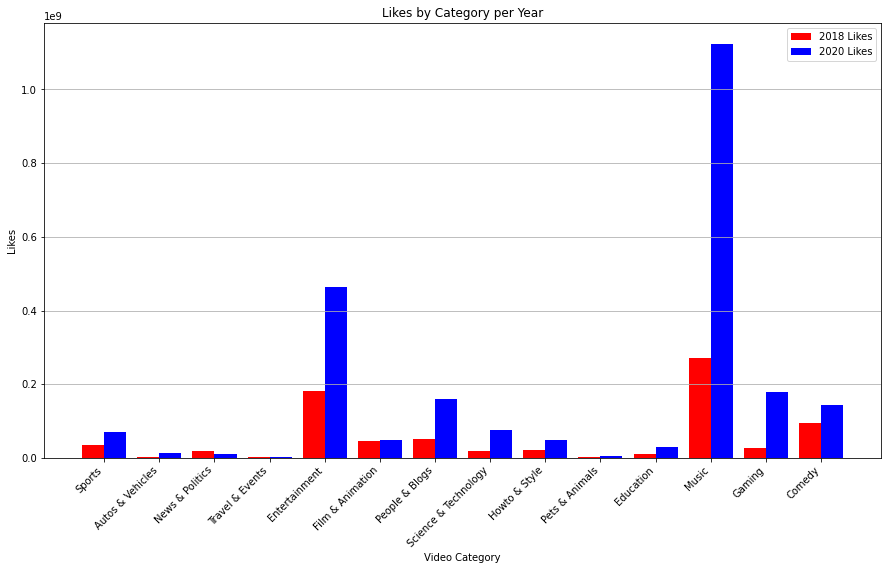

In [12]:
# comparing likes to views for each 
cat_count_ca_merged = cat_count_ca_2018.merge(cat_count_ca_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_ca_merged
print(cat_count_ca_merged[['cat_name', 'likes_2018', 'likes_2020']])

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_ca_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_ca_merged['likes_2018'], width=0.4, label='2018 Likes', color='red')
plt.bar(ypos+0.2, cat_count_ca_merged['likes_2020'], width=0.4, label='2020 Likes', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_ca_merged['cat_name'])
ax.set_xticklabels(cat_count_ca_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes')

# Create the title of the barplot
plt.title("Likes by Category per Year")

### Great Britian Yearly Data

In [13]:
# categorize data by video category
cat_count_gb_2018 = gb_2018_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_gb_2018['likes_to_views'] = ((cat_count_gb_2018['likes'] / cat_count_gb_2018['views'])*100)
cat_count_gb_2018 = cat_count_gb_2018.rename(columns={'category_id':'cat_count'})
# appears that YouTube removed Shows and Movies categories
# https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/
cat_count_gb_2018 = cat_count_gb_2018[(cat_count_gb_2018['cat_name'] != 'Movies') & (cat_count_gb_2018['cat_name'] != 'Shows')]
cat_count_gb_2018 = cat_count_gb_2018.sort_values(by='likes_to_views')

cat_count_gb_2020 = gb_2020_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_gb_2020['likes_to_views'] = ((cat_count_gb_2020['likes'] / cat_count_gb_2020['views'])*100)
cat_count_gb_2020 = cat_count_gb_2020.rename(columns={'cate"gory_id':'cat_count'})
cat_count_gb_2020 = cat_count_gb_2020.sort_values(by='likes_to_views')

### Great Britian Likes to Views

                cat_name  likes_to_views_2018  likes_to_views_2020
0        Travel & Events             0.640521             3.333380
1       Autos & Vehicles             1.157833             5.606231
2   Science & Technology             1.802394             3.671893
3       Film & Animation             1.872874             5.243819
4         People & Blogs             1.920561             6.379379
5                  Music             2.064774             8.059393
6                 Sports             2.467746             2.695998
7          Entertainment             2.502034             6.550022
8         Pets & Animals             2.680384             5.288300
9        News & Politics             3.285271             1.536162
10                Comedy             3.612824             8.950285
11             Education             4.121799             7.479631
12                Gaming             4.288928             5.042603
13         Howto & Style             4.894230             6.31

Text(0.5, 1.0, 'Likes to Views by Category per Year')

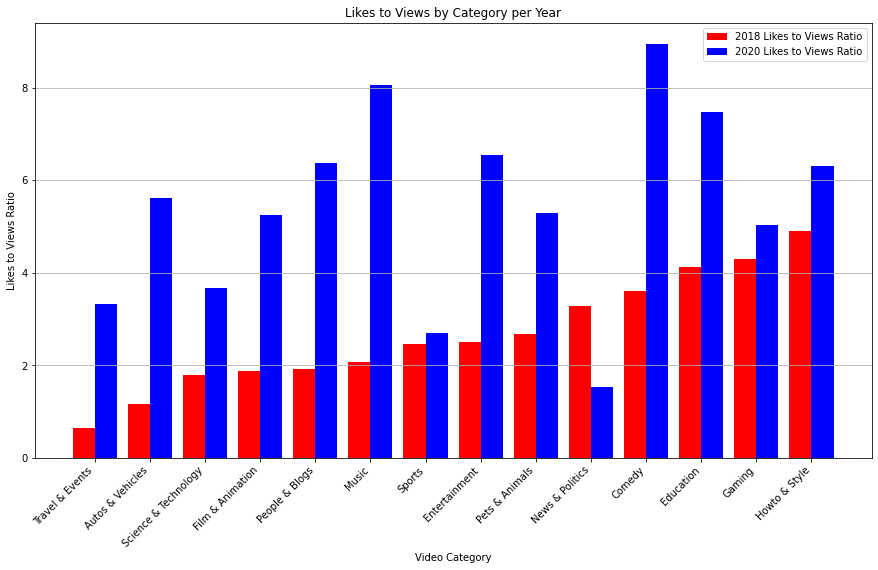

In [14]:
# comparing likes to views for each 
cat_count_gb_merged = cat_count_gb_2018.merge(cat_count_gb_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_gb_merged
print(cat_count_gb_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']])
gb_merged_likes_to_views = cat_count_gb_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']]

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_gb_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_gb_merged['likes_to_views_2018'], width=0.4, label='2018 Likes to Views Ratio', color='red')
plt.bar(ypos+0.2, cat_count_gb_merged['likes_to_views_2020'], width=0.4, label='2020 Likes to Views Ratio', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_gb_merged['cat_name'])
ax.set_xticklabels(cat_count_gb_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes to Views Ratio')
title = 'Likes to Views by Category per Year'
plt.title(title)

### Great Britian Views

                cat_name    views_2018   views_2020
0        Travel & Events     108312772     29143483
1       Autos & Vehicles     125352013    291306830
2   Science & Technology    1078184478   1832266741
3       Film & Animation    5426059163    719360056
4         People & Blogs    4279245492   2068945642
5                  Music  100340762840  11389318113
6                 Sports    2772007923   2698393395
7          Entertainment   15574089719   6047222450
8         Pets & Animals     321255520     73325150
9        News & Politics     593773158    410859701
10                Comedy    2031139802    988609556
11             Education     321890456    364901361
12                Gaming    1200883885   2792329014
13         Howto & Style     775238748    518804764


Text(0.5, 1.0, 'Views by Category per Year')

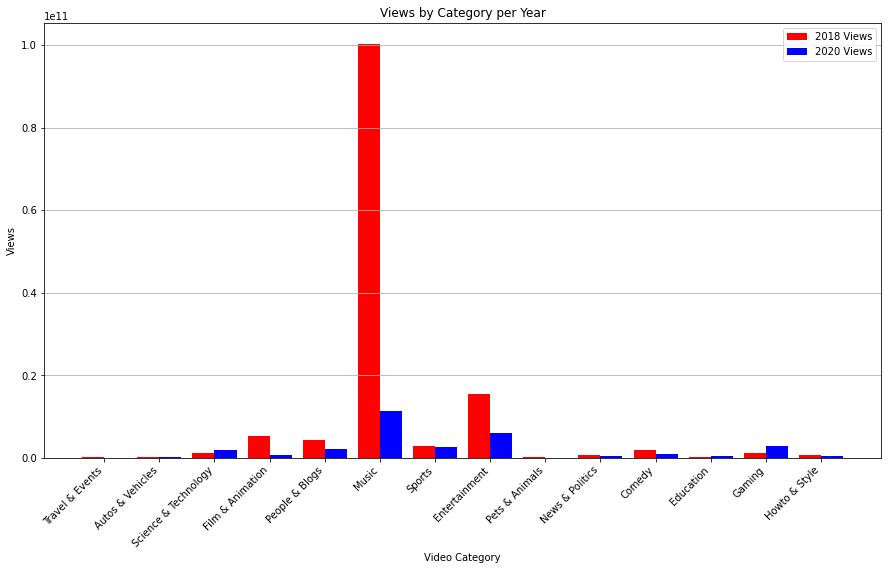

In [15]:
# comparing likes to views for each 
cat_count_gb_merged = cat_count_gb_2018.merge(cat_count_gb_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_gb_merged
print(cat_count_gb_merged[['cat_name', 'views_2018', 'views_2020']])

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_gb_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_gb_merged['views_2018'], width=0.4, label='2018 Views', color='red')
plt.bar(ypos+0.2, cat_count_gb_merged['views_2020'], width=0.4, label='2020 Views', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_gb_merged['cat_name'])
ax.set_xticklabels(cat_count_gb_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Views')

# Create the title of the barplot
plt.title("Views by Category per Year")

### Great Britian Likes

                cat_name  likes_2018  likes_2020
0        Travel & Events      693766      971463
1       Autos & Vehicles     1451367    16331335
2   Science & Technology    19433136    67278880
3       Film & Animation   101623250    37721937
4         People & Blogs    82185539   131985877
5                  Music  2071810219   917909891
6                 Sports    68406117    72748632
7          Entertainment   389668969   396094404
8         Pets & Animals     8610883     3877654
9        News & Politics    19507058     6311471
10                Comedy    73381502    88483377
11             Education    13267679    27293277
12                Gaming    51505046   140806073
13         Howto & Style    37941970    32753194


Text(0.5, 1.0, 'Likes by Category per Year')

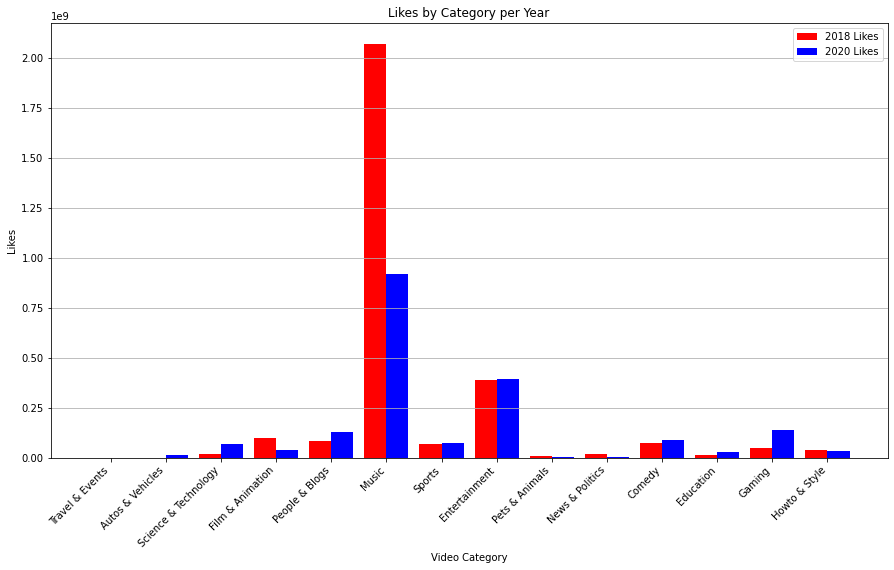

In [16]:
# comparing likes to views for each 
cat_count_gb_merged = cat_count_gb_2018.merge(cat_count_gb_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_gb_merged
print(cat_count_gb_merged[['cat_name', 'likes_2018', 'likes_2020']])

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_gb_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_gb_merged['likes_2018'], width=0.4, label='2018 Likes', color='red')
plt.bar(ypos+0.2, cat_count_gb_merged['likes_2020'], width=0.4, label='2020 Likes', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_gb_merged['cat_name'])
ax.set_xticklabels(cat_count_gb_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes')

# Create the title of the barplot
plt.title("Likes by Category per Year")

### USA Yearly Data

In [17]:
# categorize data by video category
cat_count_us_2018 = us_2018_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_us_2018['likes_to_views'] = ((cat_count_us_2018['likes'] / cat_count_us_2018['views'])*100)
cat_count_us_2018 = cat_count_us_2018.rename(columns={'category_id':'cat_count'})
# appears that YouTube removed Shows and Movies categories
# https://techpostplus.com/youtube-video-categories-list-faqs-and-solutions/
cat_count_us_2018 = cat_count_us_2018[(cat_count_us_2018['cat_name'] != 'Movies') & (cat_count_us_2018['cat_name'] != 'Shows')]
cat_count_us_2018 = cat_count_us_2018.sort_values(by='likes_to_views')

cat_count_us_2020 = us_2020_df.groupby('cat_name').agg({'category_id': 'count', 'views' : 'sum', 'likes': 'sum', 'dislikes': 'sum'}).reset_index()
cat_count_us_2020['likes_to_views'] = ((cat_count_us_2020['likes'] / cat_count_us_2020['views'])*100)
cat_count_us_2020 = cat_count_us_2020.rename(columns={'cate"gory_id':'cat_count'})
cat_count_us_2020 = cat_count_us_2020.sort_values(by='likes_to_views')

### USA Likes to Views

                 cat_name  likes_to_views_2018  likes_to_views_2020
0        Autos & Vehicles             0.559971             5.413169
1         Travel & Events             1.311384             4.710590
2         News & Politics             1.344845             1.520568
3                  Sports             2.386966             2.233753
4        Film & Animation             2.389420             5.256809
5    Science & Technology             2.503385             3.590343
6           Entertainment             2.576842             6.278847
7          Pets & Animals             2.822495             5.047531
8          People & Blogs             3.155135             6.386999
9                  Gaming             3.652010             4.785119
10              Education             3.734761             6.948761
11                  Music             3.905155             7.220889
12                 Comedy             4.090107             8.661528
13          Howto & Style             4.247042  

Text(0.5, 1.0, 'Likes to Views by Category per Year')

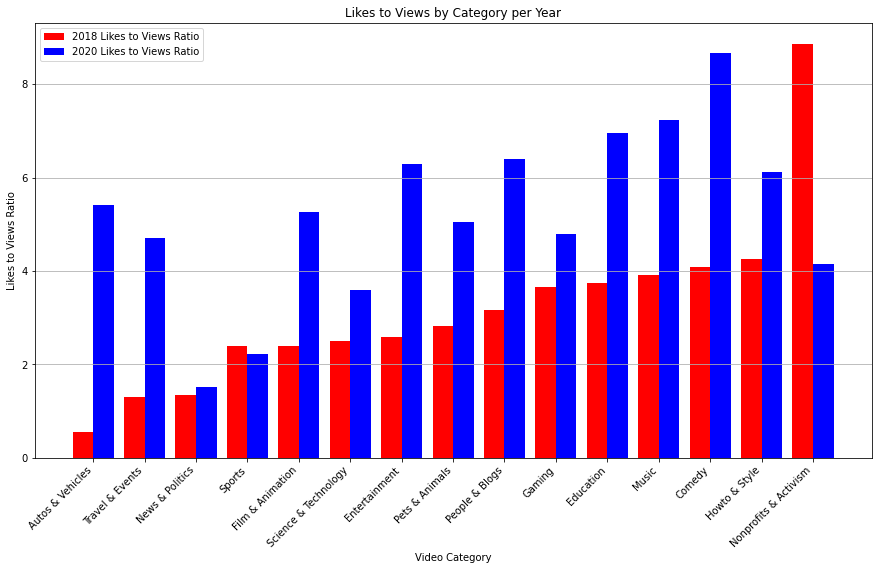

In [18]:
# comparing likes to views for each 
cat_count_us_merged = cat_count_us_2018.merge(cat_count_us_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_us_merged
print(cat_count_us_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']])
us_merged_likes_to_views = cat_count_us_merged[['cat_name', 'likes_to_views_2018', 'likes_to_views_2020']]

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_us_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_us_merged['likes_to_views_2018'], width=0.4, label='2018 Likes to Views Ratio', color='red')
plt.bar(ypos+0.2, cat_count_us_merged['likes_to_views_2020'], width=0.4, label='2020 Likes to Views Ratio', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_us_merged['cat_name'])
ax.set_xticklabels(cat_count_us_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes to Views Ratio')
title = 'Likes to Views by Category per Year'
plt.title(title)

### USA Views

                 cat_name   views_2018   views_2020
0        Autos & Vehicles    436285084    304420726
1         Travel & Events    258436122     30181652
2         News & Politics    634232120    706668129
3                  Sports   2771004649   2817764958
4        Film & Animation   3288201226   1029301675
5    Science & Technology   1468510641   1939319427
6           Entertainment   8650821419   7131035267
7          Pets & Animals    355331671    111114109
8          People & Blogs   2551381305   2675734227
9                  Gaming    664830694   4087364825
10              Education    612893174    397808165
11                  Music  14172808450  17149726421
12                 Comedy   2781750663   1315500713
13          Howto & Style   1793594449    804718516
14  Nonprofits & Activism    166060038     15717274


Text(0.5, 1.0, 'Views by Category per Year')

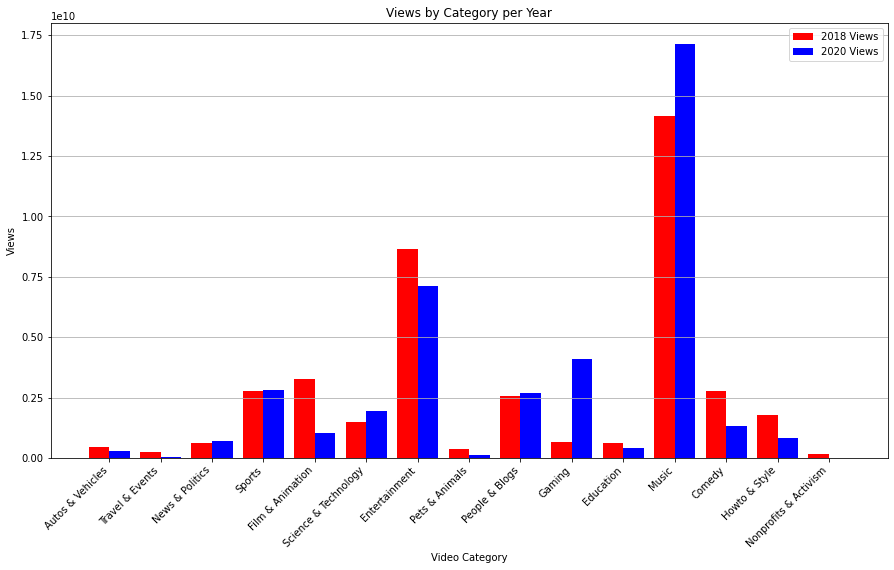

In [19]:
# comparing likes to views for each 
cat_count_us_merged = cat_count_us_2018.merge(cat_count_us_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_us_merged
print(cat_count_us_merged[['cat_name', 'views_2018', 'views_2020']])

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_us_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_us_merged['views_2018'], width=0.4, label='2018 Views', color='red')
plt.bar(ypos+0.2, cat_count_us_merged['views_2020'], width=0.4, label='2020 Views', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_us_merged['cat_name'])
ax.set_xticklabels(cat_count_us_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Views')

# Create the title of the barplot
plt.title("Views by Category per Year")

### USA Likes

                 cat_name  likes_2018  likes_2020
0        Autos & Vehicles     2443068    16478809
1         Travel & Events     3389090     1421734
2         News & Politics     8529436    10745366
3                  Sports    66142929    62941905
4        Film & Animation    78568941    54108427
5    Science & Technology    36762476    69628219
6           Entertainment   222917962   447746825
7          Pets & Animals    10029219     5608519
8          People & Blogs    80499535   170899127
9                  Gaming    24279681   195585275
10              Education    22890097    27642739
11                  Music   553470156  1238362701
12                 Comedy   113776570   113942460
13          Howto & Style    76174702    49216056
14  Nonprofits & Activism    14716813      651744


Text(0.5, 1.0, 'Likes by Category per Year')

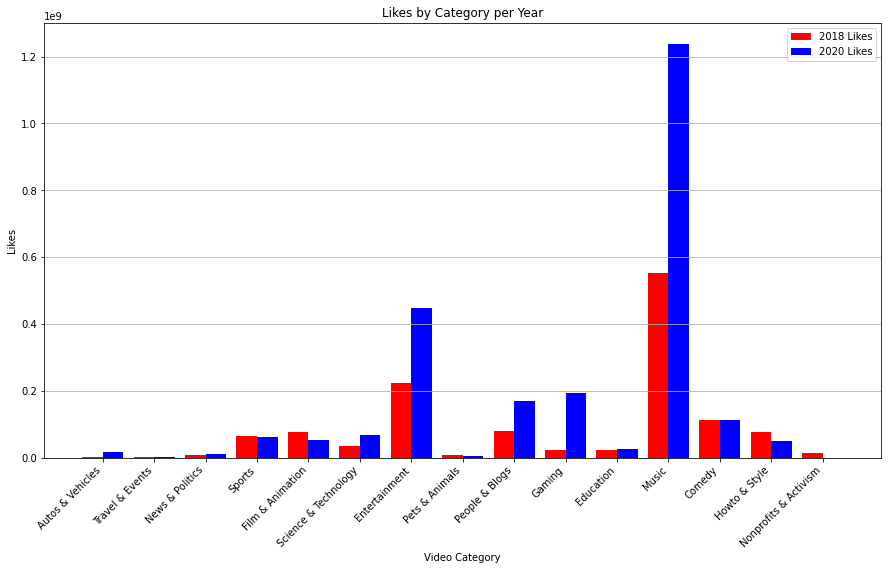

In [20]:
# comparing likes to views for each 
cat_count_us_merged = cat_count_us_2018.merge(cat_count_us_2020, left_on='cat_name', right_on='cat_name', suffixes=("_2018","_2020"))
cat_count_us_merged
print(cat_count_us_merged[['cat_name', 'likes_2018', 'likes_2020']])

plt.figure(figsize=(15,8))

ypos = np.arange(len(cat_count_us_merged))
# Create bars at specified locations
plt.bar(ypos-0.2, cat_count_us_merged['likes_2018'], width=0.4, label='2018 Likes', color='red')
plt.bar(ypos+0.2, cat_count_us_merged['likes_2020'], width=0.4, label='2020 Likes', color='blue')

ax = plt.gca()
plt.xticks(ypos, cat_count_us_merged['cat_name'])
ax.set_xticklabels(cat_count_us_merged['cat_name'])
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Video Category')    
plt.legend()
plt.ylabel('Likes')

# Create the title of the barplot
plt.title("Likes by Category per Year")

## Chi-Squared Statistical Test on Likes to Views Data

### Total Yearly Data

In [31]:
# transpose the data
likes_to_views_cats_yearly = total_merged_likes_to_views.T
likes_to_views_cats_yearly

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cat_name,Autos & Vehicles,Travel & Events,Film & Animation,News & Politics,Sports,Music,Science & Technology,People & Blogs,Entertainment,Pets & Animals,Education,Gaming,Howto & Style,Comedy,Nonprofits & Activism
likes_to_views_2018,0.946085,1.37778,2.17362,2.2439,2.32133,2.39488,2.4155,2.47926,2.56779,2.88279,3.89154,4.16529,4.20904,4.22331,8.86234
likes_to_views_2020,5.4271,4.54458,5.29106,1.58254,2.50177,7.5391,3.69781,6.43423,6.57283,5.14184,7.13211,4.92725,6.16609,9.07869,4.14667


In [32]:
# chi-squared for all categories between 2018 and 2020
contingency = [[0.946085, 1.37778, 2.17362, 2.2439, 2.32133, 2.39488, 2.4155, 2.47926, 2.56779, 2.88279, 3.89154, 4.16529, 4.20904, 4.22331, 8.86234],
               [5.4271, 4.54458, 5.29106, 1.58254, 2.50177, 7.5391, 3.69781, 6.43423, 6.57283, 5.14184, 7.13211, 4.92725, 6.16609, 9.07869, 4.14667]]
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(p)
# result: cant tell if theres an increase in likes to views ratio between 2018 and 2020 because the p value of 0.73 > 0.05
# should not expect diff for any catgetory

0.7368281360761342


### Canada Yearly Data

In [33]:
# transpose the data
likes_to_views_cats_ca = ca_merged_likes_to_views.T
likes_to_views_cats_ca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
cat_name,Sports,Autos & Vehicles,News & Politics,Travel & Events,Entertainment,Film & Animation,People & Blogs,Science & Technology,Howto & Style,Pets & Animals,Education,Music,Gaming,Comedy
likes_to_views_2018,1.98874,1.99355,2.18877,2.41978,2.70846,2.74035,2.85117,3.29241,3.32199,3.82502,3.966,4.21158,4.48478,5.10205
likes_to_views_2020,2.58588,5.25125,1.67883,5.35063,6.90515,5.36674,6.5324,3.82621,6.12126,5.13924,7.01018,7.50779,4.99952,9.52965


In [34]:
# chi-squared for all categories between 2018 and 2020 Canada
contingency = [[1.98874, 1.99355, 2.18877, 2.41978, 2.70846, 2.74035, 2.85117, 3.29241, 3.32199, 3.82502, 3.966, 4.21158, 4.48478, 5.10205],
               [2.58588, 5.25125, 1.67883, 5.35063, 6.90515, 5.36674, 6.5324, 3.82621, 6.12126, 5.13924, 7.01018, 7.50779, 4.99952, 9.52965]]
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(p)
# result: cant tell if theres an increase in likes to views ratio between 2018 and 2020 because the p value of 0.99 > 0.05
# we should not expect diff for any catgetory

0.9991913437345783


### Great Britain Yearly Data

In [35]:
# transpose the data
likes_to_views_cats_gb = gb_merged_likes_to_views.T
likes_to_views_cats_gb

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
cat_name,Travel & Events,Autos & Vehicles,Science & Technology,Film & Animation,People & Blogs,Music,Sports,Entertainment,Pets & Animals,News & Politics,Comedy,Education,Gaming,Howto & Style
likes_to_views_2018,0.640521,1.15783,1.80239,1.87287,1.92056,2.06477,2.46775,2.50203,2.68038,3.28527,3.61282,4.1218,4.28893,4.89423
likes_to_views_2020,3.33338,5.60623,3.67189,5.24382,6.37938,8.05939,2.696,6.55002,5.2883,1.53616,8.95029,7.47963,5.0426,6.3132


In [36]:
# chi-squared for all categories between 2018 and 2020 Great Britain
contingency = [[0.640521, 1.15783, 1.80239, 1.87287, 1.92056, 2.06477, 2.46775, 2.50203, 2.68038, 3.28527, 3.61282, 4.1218, 4.28893, 4.89423],
               [3.33338, 5.60623, 3.67189, 5.24382, 6.37938, 8.05939, 2.696, 6.55002, 5.2883, 1.53616, 8.95029, 7.47963, 5.0426, 6.3132]]
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(p)
# result: cant tell if theres an increase in likes to views ratio between 2018 and 2020 because the p value of 0.89 > 0.05
# we should not expect diff for any catgetory

0.887319074751605


### USA Yearly Data

In [37]:
# transpose the data
likes_to_views_cats_us = us_merged_likes_to_views.T
likes_to_views_cats_us

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
cat_name,Autos & Vehicles,Travel & Events,News & Politics,Sports,Film & Animation,Science & Technology,Entertainment,Pets & Animals,People & Blogs,Gaming,Education,Music,Comedy,Howto & Style,Nonprofits & Activism
likes_to_views_2018,0.559971,1.31138,1.34484,2.38697,2.38942,2.50339,2.57684,2.8225,3.15514,3.65201,3.73476,3.90516,4.09011,4.24704,8.86234
likes_to_views_2020,5.41317,4.71059,1.52057,2.23375,5.25681,3.59034,6.27885,5.04753,6.387,4.78512,6.94876,7.22089,8.66153,6.11593,4.14667


In [39]:
# chi-squared for all categories between 2018 and 2020 USA
contingency = [[0.559971, 1.31138, 1.34484, 2.38697, 2.38942, 2.50339, 2.57684, 2.8225, 3.15514, 3.65201, 3.73476, 3.90516, 4.09011, 4.24704, 8.86234],
               [5.41317, 4.71059, 1.52057, 2.23375, 5.25681, 3.59034, 6.27885, 5.04753, 6.387, 4.78512, 6.94876, 7.22089, 8.66153, 6.11593, 4.14667]]
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(p)
# result: cant tell if theres an increase in likes to views ratio between 2018 and 2020 because the p value of 0.82 > 0.05
# we should not expect diff for any catgetory

0.815527914042855


In [ ]:
maybe do the same for likes, views, and dislikes.

### Chi-squared for Single Categories for 2018 and 2020
###### Is there a difference between views, likes, and dislikes in 2018 vs 2020?

#### Gaming

In [40]:
### OPTIONAL ###

single_cat_total_merged = cat_count_total_merged[cat_count_total_merged['cat_name'] == 'Gaming']
single_cat_total_merged = single_cat_total_merged[['views_2018', 'views_2020', 'likes_2018', 'likes_2020', 'dislikes_2018', 'dislikes_2020']]

views_2018 = single_cat_total_merged['views_2018'].iloc[0]
views_2020 = single_cat_total_merged['views_2020'].iloc[0]
likes_2018 = single_cat_total_merged['likes_2018'].iloc[0]
likes_2020 = single_cat_total_merged['likes_2020'].iloc[0]
dislikes_2018 = single_cat_total_merged['dislikes_2018'].iloc[0]
dislikes_2020 = single_cat_total_merged['dislikes_2020'].iloc[0]

contingency = [[views_2018, likes_2018, dislikes_2018], [views_2020, likes_2020, dislikes_2020]]
print(contingency)
chi2, p, dof, expected = stats.chi2_contingency(contingency)
p
print('{:.20e}'.format(p))

# The larger the value the easier it is to tell the values are different or not

[[2469110423, 102845682, 4454698], [10460961740, 515437678, 13904015]]
0.00000000000000000000e+00


In [41]:
### OPTIONAL ###

single_cat_total_merged = cat_count_total_merged[cat_count_total_merged['cat_name'] == 'Sports']
single_cat_total_merged = single_cat_total_merged[['views_2018', 'views_2020', 'likes_2018', 'likes_2020', 'dislikes_2018', 'dislikes_2020']]

views_2018 = single_cat_total_merged['views_2018'].iloc[0]
views_2020 = single_cat_total_merged['views_2020'].iloc[0]
likes_2018 = single_cat_total_merged['likes_2018'].iloc[0]
likes_2020 = single_cat_total_merged['likes_2020'].iloc[0]
dislikes_2018 = single_cat_total_merged['dislikes_2018'].iloc[0]
dislikes_2020 = single_cat_total_merged['dislikes_2020'].iloc[0]

contingency = [[views_2018, likes_2018, dislikes_2018], [views_2020, likes_2020, dislikes_2020]]
print(contingency)
chi2, p, dof, expected = stats.chi2_contingency(contingency)
p
print('{:.20e}'.format(p))

# The larger the value the easier it is to tell the values are different or not

[[7310130139, 169692485, 15717080], [8264143003, 206750255, 6820753]]
0.00000000000000000000e+00


In [42]:
### OPTIONAL ###

single_cat_total_merged = cat_count_total_merged[cat_count_total_merged['cat_name'] == 'Pets & Animals']
single_cat_total_merged = single_cat_total_merged[['views_2018', 'views_2020', 'likes_2018', 'likes_2020', 'dislikes_2018', 'dislikes_2020']]

views_2018 = single_cat_total_merged['views_2018'].iloc[0]
views_2020 = single_cat_total_merged['views_2020'].iloc[0]
likes_2018 = single_cat_total_merged['likes_2018'].iloc[0]
likes_2020 = single_cat_total_merged['likes_2020'].iloc[0]
dislikes_2018 = single_cat_total_merged['dislikes_2018'].iloc[0]
dislikes_2020 = single_cat_total_merged['dislikes_2020'].iloc[0]

contingency = [[views_2018, likes_2018, dislikes_2018], [views_2020, likes_2020, dislikes_2020]]
print(contingency)
chi2, p, dof, expected = stats.chi2_contingency(contingency)
p
print('{:.20e}'.format(p))

# The larger the value the easier it is to tell the values are different or not

[[768339292, 22149635, 526650], [284910043, 14649611, 257729]]
0.00000000000000000000e+00
